<img src="https://mma.prnewswire.com/media/617186/Pearson_Logo.jpg" width="400" height="400" align="center"/>

<img src="https://images.datacamp.com/image/upload/v1686564840/datarhys_an_absurdist_oil_painting_of_a_cyborg_panda_and_a_cybo_c7deba5e_79f3_498a_ada9_381d6fe0b77a_b943fa043f.png" width="600" height="400" align="center"/>

# <center>Pandas vs Polars Data Analysis </center>

In [2]:
pip install polars


  Using cached polars-0.20.6-cp38-abi3-macosx_11_0_arm64.whl (25.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install pandas==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


In [7]:
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from string import ascii_letters
import random

sns.set()


### Creating a dataframe

In [8]:
df = pl.DataFrame({
    'name': ['John', 'Sara', 'Jack'],
    'age': [23, 21, 25]
})

### Reading a dataframe as lazy

In [18]:
lazy_df = pl.LazyFrame(df)
print(lazy_df.collect())

shape: (3, 2)
┌──────┬─────┐
│ name ┆ age │
│ ---  ┆ --- │
│ str  ┆ i64 │
╞══════╪═════╡
│ John ┆ 23  │
│ Sara ┆ 21  │
│ Jack ┆ 25  │
└──────┴─────┘


### Manipulating a dataframe 

In [19]:
new_df = df.select(['name'])
print(new_df)

shape: (3, 1)
┌──────┐
│ name │
│ ---  │
│ str  │
╞══════╡
│ John │
│ Sara │
│ Jack │
└──────┘


### Merging two dataframes in Polars

In [20]:
df1 = pl.DataFrame({
    'name': ['John', 'Sara', 'Jack'],
    'age': [23, 21, 25]
})

df2 = pl.DataFrame({
    'name': ['John', 'Sara', 'Jack'],
    'city': ['New York', 'Paris', 'London']
})

merged_df = df1.join(df2, on='name')
print(merged_df)

shape: (3, 3)
┌──────┬─────┬──────────┐
│ name ┆ age ┆ city     │
│ ---  ┆ --- ┆ ---      │
│ str  ┆ i64 ┆ str      │
╞══════╪═════╪══════════╡
│ John ┆ 23  ┆ New York │
│ Sara ┆ 21  ┆ Paris    │
│ Jack ┆ 25  ┆ London   │
└──────┴─────┴──────────┘


### Handling Missing Values

In [24]:
df = pl.DataFrame({
    'name': ['John', 'Sara', None],
    'age': [23, None, 25]
})

filled_df = df.drop_nulls()
print(filled_df)

shape: (1, 2)
┌──────┬─────┐
│ name ┆ age │
│ ---  ┆ --- │
│ str  ┆ i64 │
╞══════╪═════╡
│ John ┆ 23  │
└──────┴─────┘


### Applying Functions 

In [33]:
df = pl.DataFrame({
    'name': ['John', 'Sara', 'Jack'],
    'age': [23, 21, 25]
})

def add_ten(x):
    return x + 10

df = df.with_columns(df['age'].apply(add_ten).alias('age_plus_ten'))
print(df)

shape: (3, 3)
┌──────┬─────┬──────────────┐
│ name ┆ age ┆ age_plus_ten │
│ ---  ┆ --- ┆ ---          │
│ str  ┆ i64 ┆ i64          │
╞══════╪═════╪══════════════╡
│ John ┆ 23  ┆ 33           │
│ Sara ┆ 21  ┆ 31           │
│ Jack ┆ 25  ┆ 35           │
└──────┴─────┴──────────────┘


/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/2048929546.py:9: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  df = df.with_columns(df['age'].apply(add_ten).alias('age_plus_ten'))
/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/2048929546.py:9: PolarsInefficientMapWarning: 
Series.map_elements is significantly slower than the native series API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - s.map_elements(add_ten)
with this one instead:
  + s + 10

  df = df.with_columns(df['age'].apply(add_ten).alias('age_plus_ten'))


### Loading a diamond dataset

In [35]:
# read csv file
import polars as pl
data = pl.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/diamond.csv')

# check the head
data.head()

Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
f64,str,str,str,str,str,str,i64
1.1,"""Ideal""","""H""","""SI1""","""VG""","""EX""","""GIA""",5169
0.83,"""Ideal""","""H""","""VS1""","""ID""","""ID""","""AGSL""",3470
0.85,"""Ideal""","""H""","""SI1""","""EX""","""EX""","""GIA""",3183
0.91,"""Ideal""","""E""","""SI1""","""VG""","""VG""","""GIA""",4370
0.83,"""Ideal""","""G""","""SI1""","""EX""","""EX""","""GIA""",3171


In [36]:
data.shape

(6000, 8)

In [37]:
type(data)

polars.dataframe.frame.DataFrame

### Selecting & filtering data

In [38]:
# Select specific columns: carat, cut, and price
selected_df = data.select(['Carat Weight', 'Cut', 'Price'])

# show selected_df head
selected_df.head()

Carat Weight,Cut,Price
f64,str,i64
1.1,"""Ideal""",5169
0.83,"""Ideal""",3470
0.85,"""Ideal""",3183
0.91,"""Ideal""",4370
0.83,"""Ideal""",3171


Filtering rows based on certain conditions can be done using the filter() method. For instance, to filter rows where the carat is greater than 2.0, you can do the following:

In [39]:
# filter the df with condition
filtered_df = data.filter(pl.col('Carat Weight') > 2.0)

# show filtered_df head
filtered_df.head()

Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
f64,str,str,str,str,str,str,i64
2.11,"""Ideal""","""H""","""SI1""","""VG""","""VG""","""GIA""",18609
2.51,"""Very Good""","""G""","""VS2""","""VG""","""VG""","""GIA""",34361
2.2,"""Ideal""","""H""","""VS2""","""EX""","""VG""","""GIA""",22241
2.6,"""Ideal""","""G""","""VS2""","""EX""","""EX""","""GIA""",37621
2.02,"""Good""","""I""","""VVS2""","""EX""","""VG""","""GIA""",19756


### Sorting & ordering data

Polars provides the sort() method to sort a DataFrame based on one or more columns. Here's an example:

In [40]:
# sort the df by price
sorted_df = data.sort(by='Price')

# show sorted_df head
sorted_df.head()

Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
f64,str,str,str,str,str,str,i64
0.77,"""Good""","""I""","""VS1""","""VG""","""G""","""AGSL""",2184
0.77,"""Good""","""I""","""SI1""","""EX""","""VG""","""GIA""",2241
0.78,"""Very Good""","""I""","""SI1""","""EX""","""VG""","""GIA""",2348
0.75,"""Ideal""","""I""","""SI1""","""VG""","""VG""","""GIA""",2383
0.76,"""Very Good""","""H""","""SI1""","""G""","""G""","""GIA""",2396


### Handling missing values

Polars provides convenient methods to handle missing values. The drop_nulls() method allows you to drop rows that contain any missing values:

In [41]:
# drop missing values
cleaned_df = data.drop_nulls()


# show cleaned_df head
cleaned_df.head()

Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
f64,str,str,str,str,str,str,i64
1.1,"""Ideal""","""H""","""SI1""","""VG""","""EX""","""GIA""",5169
0.83,"""Ideal""","""H""","""VS1""","""ID""","""ID""","""AGSL""",3470
0.85,"""Ideal""","""H""","""SI1""","""EX""","""EX""","""GIA""",3183
0.91,"""Ideal""","""E""","""SI1""","""VG""","""VG""","""GIA""",4370
0.83,"""Ideal""","""G""","""SI1""","""EX""","""EX""","""GIA""",3171


Alternatively, you can use the fill_nulls() method to replace missing values with a specified default value or fill method.

### Grouping data based on specific columns

To group data based on specific columns, you can use the groupby() method. Here's an example that groups the data by the Cut column and calculates the average Price for each group:

In [42]:

# group by cut and calc mean of price
grouped_df = data.groupby(by='Cut').agg(pl.col('Price').mean())


# show grouped_df head
grouped_df.head()

/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/3134945344.py:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  grouped_df = data.groupby(by='Cut').agg(pl.col('Price').mean())


Cut,Price
str,f64
"""Good""",9326.65678
"""Fair""",5886.178295
"""Very Good""",11484.69687
"""Signature-Idea…",11541.525692
"""Ideal""",13127.331185


### Joining & combining dataframes 

Polars provides flexible options for joining and combining DataFrames, allowing you to merge and concatenate data from different sources. To perform a join operation, you can use the join() method. Here's an example that demonstrates an inner join between two DataFrames based on a common key column:









In [43]:
# Create the first DataFrame
df1 = pl.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})


# Create the second DataFrame
df2 = pl.DataFrame({
    'id': [2, 3, 5],
    'age': [25, 30, 35]
})


# Perform an inner join on the 'id' column
joined_df = df1.join(df2, on='id')


# Display the joined DataFrame
joined_df

id,name,age
i64,str,i64
2,"""Bob""",25
3,"""Charlie""",30


### Synthetic data polars vs pandas comparison

In [44]:
# Create a DataFrame with 10 million rows and 4 columns
num_rows = 10**7

# Create a list of random strings
str_list = ['A', 'B', 'C', 'D', 'E']
column4_data = np.random.choice(str_list, num_rows)

df = pd.DataFrame({
    'column1': np.random.randint(1, 1000, size=num_rows),
    'column2': np.random.randint(1, 1000, size=num_rows),
    'column3': np.random.randint(1, 1000, size=num_rows),
    'column4': column4_data
})

In [45]:
df.head()

,column1,column2,column3,column4
0,780,834,446,A
1,72,937,340,D
2,158,808,892,E
3,550,117,471,A
4,734,128,867,E


In [46]:
df.shape

(10000000, 4)

In [8]:
# Save the DataFrame to a CSV file
df.to_csv('large_data.csv', index=False)

### Reading the dataset

In [47]:
import time

start_time = time.time()

df = pd.read_csv('large_data.csv')
df = df[df['column1'] > 100]
df_grouped = df.groupby('column4')
result = df_grouped.size()

pandas_time = time.time() - start_time
print("Time taken by Pandas: ", pandas_time)

Time taken by Pandas:  1.6105148792266846


In [48]:
start_time = time.time()

df = pl.read_csv('large_data.csv')
df = df.filter(pl.col('column1') > 100)
df_grouped = df.groupby('column4')
result = df_grouped.count()

polars_time = time.time() - start_time
print("Time taken by Polars: ", polars_time)

Time taken by Polars:  0.5639503002166748


/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/998771109.py:5: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df_grouped = df.groupby('column4')
/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/998771109.py:6: DeprecationWarning: `count` is deprecated. It has been renamed to `len`.
  result = df_grouped.count()


In [49]:
# Calculate the percentage difference
difference = ((pandas_time - polars_time) / pandas_time) * 100

print(f"Time taken by Pandas: ", pandas_time)
print(f"Time taken by Polars: ", polars_time)
print(f"Difference in time taken to execute in percentage: {difference}%")

Time taken by Pandas:  1.6105148792266846
Time taken by Polars:  0.5639503002166748
Difference in time taken to execute in percentage: 64.98322943234993%


### Filtering rows based on condition

In [50]:
%%timeit 

df = pl.scan_csv('large_data.csv')
result_df = df.filter(pl.col('column4')=='D').collect()
#Ddf = df.filter(pl.col('column1') > 100)

#.collect()

#result_df

132 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%%timeit 

df = pd.read_csv('large_data.csv')
result_df = df[df['column4']=='D']

1.29 s ± 33.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
def create_table(n):
    np.random.seed(42)
    # Create dataframe with sales information
    df = pd.DataFrame({'id' : [''.join(random.choice(ascii_letters) for x in range(10)) for _ in range(n)],
                       'date' :pd.date_range(start='1990-01-01', periods=n, freq='T'),
                       'office' : np.random.choice(['United States',
                                                    'Brasil','Spain',
                                                    'France','China',
                                                    'United Kingdom',
                                                    'Italy','Canada',
                                                    'India','Argentina'],size=n).astype(str),
                       'sales' : np.random.randint(0,10000, size= n).astype(np.int32),
                      'revenue' : np.random.randint(0,10000, size= n).astype(np.int32)})
    
    # Add some random nan values
   
    cols_list = df.select_dtypes('number').columns.tolist()
        
    for col in df[cols_list]:
        df.loc[df.sample(frac=0.05).index, col] = np.nan
                    
    return df

In [62]:
def create_table_2(n):
    # Fictional databse with transactions in Italy office during 2022

    np.random.seed(42)
    df = pd.DataFrame({'id' : italy_2022_id,
                       'year':2022,
                       'name' : [''.join(random.choice(ascii_letters) for x in range(5)) for _ in range(n)],
                       'surname' : [''.join(random.choice(ascii_letters) for x in range(5)) for _ in range(n)],
                       'responsibility' : np.random.choice(['Sales Director', 
                                                            'Sales Manager',
                                                            'Sales Intern','Sales Executive',
                                                            'Sales Intern'],size=n).astype(str), 
                       'sex' :  np.random.choice(['male','female','non-binary'], size =n).astype(str)})
                       
    return df

In [54]:
df = create_table(22616640)

In [55]:
df.head()

,id,date,office,sales,revenue
0,RAhrngfGbw,1990-01-01 00:00:00,Italy,1260.0,4027.0
1,TBUgrZBark,1990-01-01 00:01:00,France,3330.0,8467.0
2,yAqaqmpRjt,1990-01-01 00:02:00,Canada,595.0,1195.0
3,dXsChgdGFE,1990-01-01 00:03:00,China,2042.0,2810.0
4,AUGolJCINQ,1990-01-01 00:04:00,Italy,NaN,9245.0


In [56]:
df.shape

(22616640, 5)

In [27]:
df.to_csv('country_sales.csv')

In [64]:
#italy_2022_id = df.query('office == "Italy" and date.dt.year == 2022')['id'].values
#italy_2022 = create_table_2(50000)
#italy_2022_pl = pl.DataFrame(italy_2022)

In [65]:
def reading_comparison(pd_time, pd_pyarrow_time, pl_time, title):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    times = [pd_time, pd_pyarrow_time, pl_time]
    times = np.round(times, 2)

    sns.barplot(x = ['pandas (numpy)','pandas (pyarrow)','polars'], 
                y = times, 
                edgecolor='black')


    ax.set_title(f"{title} Test")
    ax.set_ylabel("Running time (seconds)")
    ax.bar_label(ax.containers[0])
    plt.savefig(f'./pandas_vs_polars_{title}.png', transparent=False,  facecolor='white', bbox_inches="tight")
    plt.show()

In [66]:
def plot_comparison(pd_time, pl_time, title):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    times = [pd_time, pl_time]
    times = np.round(times, 2)

    sns.barplot(x = ['pandas','polars'], 
                y = times, 
                edgecolor='black')


    ax.set_title(f"{title} Test")
    ax.set_ylabel("Running time (seconds)")
    ax.bar_label(ax.containers[0])
    plt.savefig(f'./pandas_vs_polars_{title}.png', transparent=False,  facecolor='white', bbox_inches="tight")
    plt.show()

### Reading csv dataset test

In [67]:
s = time.time()
df_pd = pd.read_csv("country_sales.csv")
df_pd = df_pd[['id', 'date', 'office', 'sales']]
df_pd.query('office =="France"')
e = time.time()
pd_time= e-s
print("pandas Loading Time = {}".format(pd_time))

pandas Loading Time = 19.216981887817383


In [68]:
s = time.time()
df_pd_arrow = pd.read_csv("country_sales.csv", engine="pyarrow")
df_pd_arrow= df_pd_arrow[['id', 'date', 'office', 'sales']]
df_pd_arrow.query('office == "France"')
e = time.time()
pd_pyarrow_time= e-s

print("pandas pyarrow Loading Time = {}".format(pd_pyarrow_time))

pandas pyarrow Loading Time = 25.80471897125244


In [69]:
s = time.time()
df_pl = pl.read_csv('country_sales.csv').filter(
     (pl.col('office') == 'France'))
df_pl.select(pl.col(['id', 'date', 'office', 'sales'])) 
e = time.time() 
pl_time= e-s
print("polars Loading Time = {}".format(pl_time))

polars Loading Time = 2.320039987564087


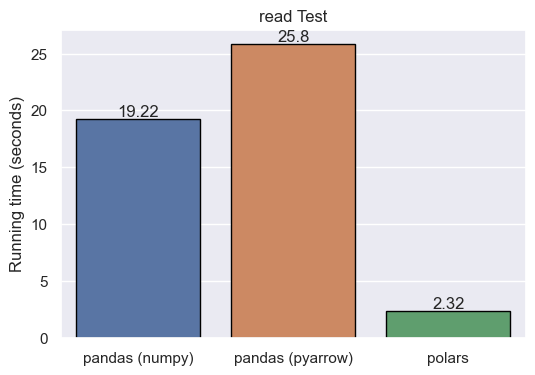

In [70]:
reading_comparison(pd_time, pd_pyarrow_time, pl_time, 'read')

In [74]:
df_pd.head()

,id,date,office,sales
0,WFqcZkhHFU,1990-01-01 00:00:00,Italy,1260.0
1,EFvyruFfRL,1990-01-01 00:01:00,France,3330.0
2,mfQDvQtLnY,1990-01-01 00:02:00,Canada,595.0
3,AfEUFNfYEG,1990-01-01 00:03:00,China,2042.0
4,DoUsqYOjdZ,1990-01-01 00:04:00,Italy,NaN


In [75]:
df_pd_arrow.head()

,id,date,office,sales
0,WFqcZkhHFU,1990-01-01 00:00:00,Italy,1260.0
1,EFvyruFfRL,1990-01-01 00:01:00,France,3330.0
2,mfQDvQtLnY,1990-01-01 00:02:00,Canada,595.0
3,AfEUFNfYEG,1990-01-01 00:03:00,China,2042.0
4,DoUsqYOjdZ,1990-01-01 00:04:00,Italy,NaN


In [76]:
df_pl.head()

,id,date,office,sales,revenue
i64,str,str,str,f64,f64
1,"""EFvyruFfRL""","""1990-01-01 00:…","""France""",3330.0,8467.0
10,"""yGDQylTcdt""","""1990-01-01 00:…","""France""",9433.0,5379.0
29,"""ZmygvMHAgE""","""1990-01-01 00:…","""France""",4489.0,3457.0
39,"""XYwhkEaoLw""","""1990-01-01 00:…","""France""",8652.0,1767.0
47,"""TlkTQYaUZM""","""1990-01-01 00:…","""France""",5524.0,1242.0


In [73]:
df_pd.dtypes

id         object
date       object
office     object
sales     float64
dtype: object

In [77]:
df_pl.dtypes

[Int64, String, String, String, Float64, Float64]

### Groupby and Aggregation Test

In [78]:
convert_to_date = ['date']

In [79]:
df_pl = (
    df_pl.with_columns([
        pl.col(convert_to_date).str.strptime(
            pl.Date,
            format='%m/%d/%Y %H:%M:%s.%f', strict=False
        )
    ])
)

/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/1012315351.py:3: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col(convert_to_date).str.strptime(


In [80]:
df_pl.dtypes

[Int64, String, Date, String, Float64, Float64]

In [81]:
df_pl.head()

,id,date,office,sales,revenue
i64,str,date,str,f64,f64
1,"""EFvyruFfRL""",null,"""France""",3330.0,8467.0
10,"""yGDQylTcdt""",null,"""France""",9433.0,5379.0
29,"""ZmygvMHAgE""",null,"""France""",4489.0,3457.0
39,"""XYwhkEaoLw""",null,"""France""",8652.0,1767.0
47,"""TlkTQYaUZM""",null,"""France""",5524.0,1242.0


### Mean

In [91]:
df_pd['date'] = pd.to_datetime(df_pd['date'],errors='coerce')
df_pd['date'] = df_pd['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_pd['date'] = pd.to_datetime(df_pd['date'],errors='coerce')

In [92]:
df_pd.dtypes

id                object
date      datetime64[ns]
office            object
sales            float64
dat       datetime64[ns]
dtype: object

In [93]:
s = time.time()
df_pd.groupby([df_pd.office, df_pd.date.dt.month])['sales'].agg('mean')
e = time.time()
pd_time= e-s
print("pandas Loading Time = {}".format(pd_time))

pandas Loading Time = 1.773756742477417


In [94]:
s = time.time()
df_pl.groupby([pl.col('office'), pl.col('date').dt.month()]).agg([pl.mean('sales')])
e = time.time()
pl_time= e-s
print("polars Loading Time = {}".format(pl_time))

polars Loading Time = 0.1337730884552002


/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/2258123832.py:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df_pl.groupby([pl.col('office'), pl.col('date').dt.month()]).agg([pl.mean('sales')])


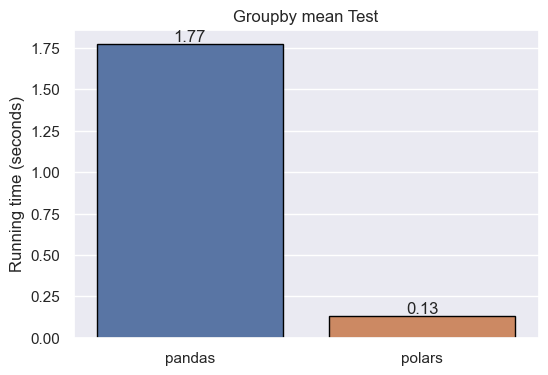

In [95]:
plot_comparison(pd_time, pl_time, 'Groupby mean')

### Median

In [96]:
s = time.time()
df_pd.groupby([df_pd.office, df_pd.date.dt.month])['sales'].agg('median')
e = time.time()
pd_time= e-s
print("pandas Loading Time = {}".format(pd_time))

pandas Loading Time = 1.9788939952850342


In [97]:
s = time.time()
df_pl.groupby([pl.col('office'), pl.col('date').dt.month()]).agg([pl.median('sales')])
e = time.time()
pl_time= e-s
print("polars Loading Time = {}".format(pl_time))

polars Loading Time = 0.13085007667541504


/var/folders/sz/bnngcgwd3n50tz13wnb4rzbc0000gn/T/ipykernel_59071/3082775015.py:2: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  df_pl.groupby([pl.col('office'), pl.col('date').dt.month()]).agg([pl.median('sales')])


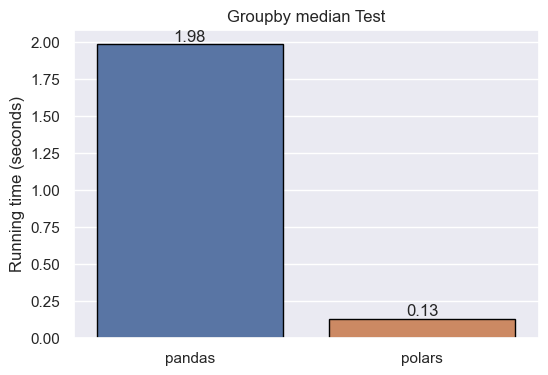

In [98]:
plot_comparison(pd_time, pl_time, 'Groupby median')

### Rolling Mean Test

In [99]:
df_pd= df_pd.set_index('date')

In [100]:
s = time.time()
df_pd['sales'].rolling(1440, min_periods=1).mean()
e = time.time()
pd_time= e-s
print("pandas Loading Time = {}".format(pd_time))

pandas Loading Time = 0.5058209896087646


In [102]:
s = time.time()
df_pl['sales'].rolling_mean(1440, min_periods=1)
e = time.time()
pl_time= e-s
print("polars Loading Time = {}".format(pl_time))

polars Loading Time = 0.04566216468811035


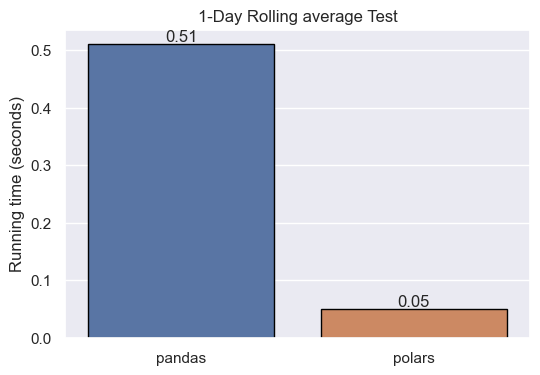

In [103]:
plot_comparison(pd_time, pl_time, '1-Day Rolling average')

### Finding sum of 10 million observations

### Pandas

In [104]:
# create random DataFrame with 10 million rows and 2 columns
pd_df = pd.DataFrame(np.random.rand(10000000, 2), columns=['a', 'b'])


In [105]:
pd_df.head()

,a,b
0,0.817927,0.109098
1,0.834262,0.626034
2,0.510619,0.560033
3,0.744468,0.297637
4,0.943477,0.307637


In [106]:
# compute sum of each column using Pandas
%timeit pd_df.sum()

161 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Polars

In [107]:
# create random DataFrame with 10 million rows and 2 columns
pl_df = pl.DataFrame({
    'a': np.random.rand(10000000),
    'b': np.random.rand(10000000)})


In [108]:
pl_df.head()

a,b
f64,f64
0.909448,0.259213
0.152014,0.911691
0.869773,0.460136
0.963704,0.713441
0.980983,0.023215


In [109]:
# compute sum of each column using Polar
%timeit pl_df.sum()

2.86 ms ± 49 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### References

https://medium.com/illumination/pandas-vs-polars-performance-battle-4feb2d839b73

https://www.datacamp.com/tutorial/high-performance-data-manipulation-in-python-pandas2-vs-polars

https://www.linkedin.com/pulse/polars-vs-pandas-which-one-faster-benchmarking-analysis-saleem/

https://www.datacamp.com/blog/an-introduction-to-polars-python-s-tool-for-large-scale-data-analysis

https://ioflood.com/blog/polars/